In [ ]:
#Medición del tiempo de inicio
import time

# Registrar el tiempo actual en el momento del inicio
inicio = time.time()

# Carga de Paquetes y Librerias

In [ ]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt           # Permite trabajar con fechas

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Google
from google.colab import files  # Permite descargar archivos directamente desde Colab

# Configuración de advertencias y mensajes

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )

# Mostrar advertencia personalizada
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
def TrainingSets(data, dataξ, step_back):
    """
    Genera conjuntos de entrenamiento para un modelo de aprendizaje automático.

    Parámeters:
    - data (array-like): Datos de entrada para construir los conjuntos de entrenamiento.
    - dataξ (array-like): Etiquetas o salidas correspondientes a los datos de entrada.
    - step_back (int): Número de pasos hacia atrás para crear las secuencias de entrenamiento.

    Retorna:
    - X_train (array): Conjunto de datos de entrada de entrenamiento, en forma de secuencias.
    - ξ_train (array): Etiquetas asociadas al conjunto de entrenamiento.

    Notas:
    - Esta función toma los datos de entrada y sus etiquetas correspondientes, y crea conjuntos
      de entrenamiento utilizando ventanas deslizantes de tamaño 'step_back'.
    - 'X_train' contiene las secuencias de datos de entrada de entrenamiento.
    - 'ξ_train' contiene las etiquetas asociadas a cada secuencia en 'X_train'.
    """
    train_data = data.copy()
    train_dataξ = dataξ.copy()

    # Crear conjuntos de entrenamiento
    X_train, ξ_train = [], []
    for i in range(len(train_data) - step_back - 1):
        a = train_data[i:(i + step_back)]
        X_train.append(a)
        ξ_train.append(train_dataξ[i + step_back])

    X_train = np.array(X_train)
    ξ_train = np.array(ξ_train)
    return X_train, ξ_train

# Carga de Base de Datos

In [ ]:
# Cargar datos de demanda energética comercial en Colombia desde Google Drive (acceso libre)

# Código de identificación del archivo en Google Drive
FILEID = "1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_"  # Copiar el código desde el enlace generado en Google Drive

# Descargar el archivo utilizando wget y gestionar las cookies temporales
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt

# Descomprimir el archivo descargado en el directorio principal de Colab
!unzip Departamentos.zip

# Mostrar el contenido del directorio actual
!dir

--2023-07-30 02:53:38--  https://docs.google.com/uc?export=download&confirm=&id=1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_
Resolving docs.google.com (docs.google.com)... 173.194.215.113, 173.194.215.100, 173.194.215.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v2181grle1kot1ko2a0p3gqlvgm0g7jr/1690685625000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=d3971ebe-fb79-4ef2-b99f-96169a7580a0 [following]
--2023-07-30 02:53:45--  https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v2181grle1kot1ko2a0p3gqlvgm0g7jr/1690685625000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=d3971ebe-fb79-4ef2-b99f-96169a7580a0
Resolving doc-0c-6k-docs.googleusercontent.com (doc-0c-6k-docs.googleusercontent.com)... 173.194.213.1

In [ ]:
# Mostrar listado de elementos
!ls

Demanda_Arreglo_LSTM_Rd_CL.xlsx   Demanda_Arreglo_Mean.xlsx
Demanda_Arreglo_LSTM_Rd_Sin.xlsx  Departamentos.zip
Demanda_Arreglo_LSTM_Rd.xlsx      sample_data/


In [ ]:
# Ruta del archivo de Excel que contiene los datos
archivo_excel = '/content/Demanda_Arreglo_Mean.xlsx'

# Leer los datos desde el archivo Excel y cargarlos en un DataFrame
df = pd.read_excel(archivo_excel)

# Eliminar la columna 'Date' del DataFrame
df = df.drop('Date', axis=1)

# Generar un rango de fechas con frecuencia horaria y establecer un nuevo índice
date_rng = pd.date_range(start='2000-01-01', end='2023-01-01', freq='H')

# Establecer el índice del DataFrame a las fechas generadas, excluyendo la última fecha
df.set_index(date_rng[0:-1], inplace=True)

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

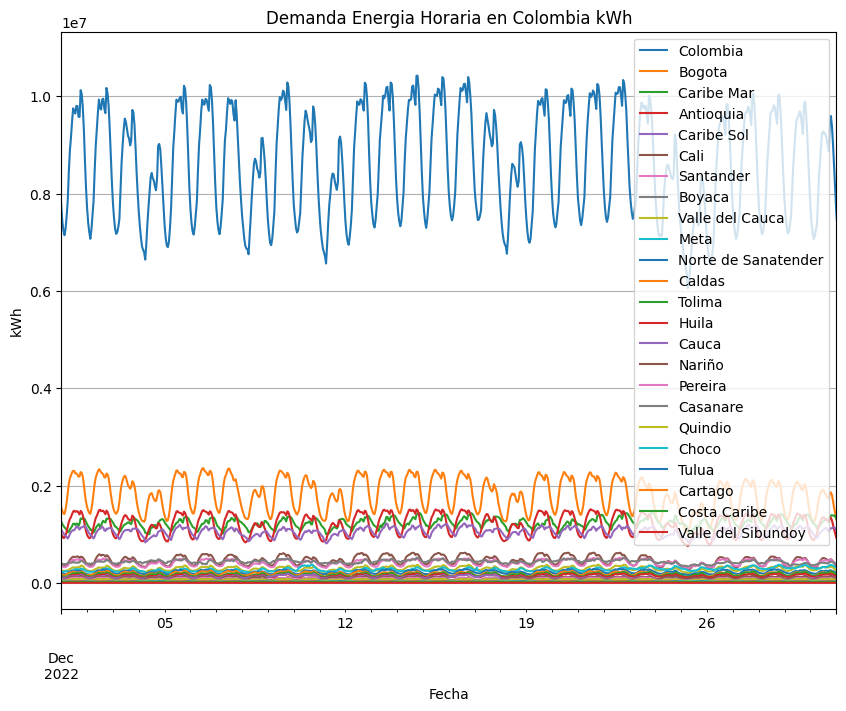

In [ ]:
# Visualizar los datos en un gráfico de líneas
df.plot(
    kind='line',                 # Tipo de gráfico: línea
    figsize=(10, 7.5),           # Tamaño de la figura: ancho x alto
    title='Demanda Energia Horaria en Colombia kWh',  # Título del gráfico
    grid=True,                   # Mostrar cuadrícula en el gráfico
    ylabel='kWh',                # Etiqueta del eje y
    xlabel='Fecha',              # Etiqueta del eje x
    xlim=('2022-12-01', '2022-12-31')  # Límites del eje x en el formato 'AAAA-MM-DD'
)

# Mostrar el gráfico
plt.show()

# Normalizacion


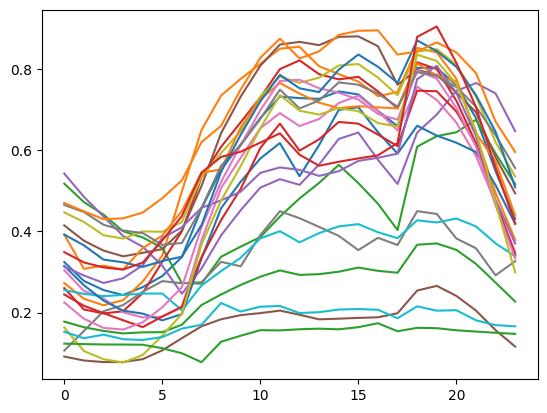

In [ ]:
# Crear una copia del DataFrame 'df' para manipulación
df1 = df.copy()

# Escalar los datos utilizando el MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1)
df1 = scaler.transform(df1)

# Visualizar los datos transformados en un gráfico
# plt.plot(df1)
plt.plot(df1[0:24, :])  # Visualizar las primeras 24 filas de los datos transformados
plt.show()

In [ ]:
# Creación de la serie horaria y la serie de salida a partir de un DataFrame
Ts1 = df1[:, 1:].copy()  # Seleccionar todas las filas y todas las columnas excepto la primera
out = df1[:, 0]          # Seleccionar la primera columna como la serie de salida

# Imprimir información sobre el tamaño de las series

# Imprimir el tamaño de la serie horaria
print('Tamaño Serie Horaria: ', Ts1.shape)

# Imprimir el tamaño de la serie de salida
print('Tamaño Serie Salida: ', out.shape)

Tamaño Serie Horaria:  (19728, 23)
Tamaño Serie Salida:  (19728,)


# Modelos DL


## TimeStep = 36

### Conjunto de Entrenamiento


In [ ]:
# Definición del tamaño de la ventana para la creación de secuencias
step_back = 18

# Crear conjuntos de entrenamiento utilizando la función 'TrainingSets'
X1, Y1 = TrainingSets(data=Ts1, dataξ=out, step_back=step_back)

# Definir la proporción de particionamiento entre entrenamiento y prueba
Part = 0.8

# Particionar los conjuntos de entrenamiento y prueba para la Serie 1

# Conjunto de datos de entrada para entrenamiento
X_train = X1[:15781]
# Conjunto de datos de entrada para validación
X_Val = X1[15781:16570]
# Conjunto de datos de entrada para prueba
X_test = X1[16570:]


# Conjunto de etiquetas para entrenamiento
Y_train = Y1[:15781]
# Conjunto de etiquetas para validación
Y_Val = Y1[15781:16570]
# Conjunto de etiquetas para prueba
Y_test = Y1[16570:]

In [ ]:
# Imprimir información sobre los tamaños de los conjuntos de datos

# Imprimir tamaños de los conjuntos de entrenamiento
print('Tamaño X_train: ', X_train.shape, 'Tamaño Y_train: ', Y_train.shape)

# Imprimir tamaños de los conjuntos de validación
print('Tamaño X_val: ', X_Val.shape, 'Tamaño Y_val: ', Y_Val.shape)

# Imprimir tamaños de los conjuntos de prueba
print('Tamaño X_test: ', X_test.shape, 'Tamaño Y_test: ', Y_test.shape)

# Imprimir separador
print('-----------------------------------------------------------------------')

Tamaño X_train:  (15781, 18, 23) Tamaño Y_train:  (15781,)
Tamaño X_val:  (789, 18, 23) Tamaño Y_val:  (789,)
Tamaño X_test:  (3139, 18, 23) Tamaño Y_test:  (3139,)
-----------------------------------------------------------------------


In [ ]:
# Configuración de entrenamiento del modelo

# Número de épocas de entrenamiento
N = 100

# Tamaño de lote (batch size) para el entrenamiento
bsz = 512

# Lista de devolución de llamadas (callbacks)
callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=0.0001),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, verbose=1),
]

### GRU

In [ ]:
# Crear un modelo secuencial de tipo GRU
model_GRU = keras.models.Sequential([
    keras.layers.GRU(100, return_sequences=True, input_shape=[step_back, Ts1.shape[1]]),
    keras.layers.GRU(100, return_sequences=True),
    keras.layers.GRU(100, return_sequences=True),
    keras.layers.GRU(1)
])
model_GRU.summary()

# Definir métricas de evaluación del modelo
metrics = ['mae', 'mse']

# Compilar el modelo
model_GRU.compile(loss="mse", optimizer="adam", metrics=metrics)

# Entrenar el modelo
history = model_GRU.fit(
    X_train, Y_train,                # Datos de entrenamiento
    epochs=N,                        # Número de épocas
    batch_size=bsz,                  # Tamaño de lote
    callbacks=callbacks,             # Devoluciones de llamada
    validation_data=[X_Val, Y_Val]   # Datos de validación
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 18, 100)           37500     
                                                                 
 gru_1 (GRU)                 (None, 18, 100)           60600     
                                                                 
 gru_2 (GRU)                 (None, 18, 100)           60600     
                                                                 
 gru_3 (GRU)                 (None, 1)                 309       
                                                                 
Total params: 159,009
Trainable params: 159,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
31/31 [==============================] - 15s 64ms/step - loss: 0.0412 - mae: 0.1583 - mse: 0.0412 - val_loss: 0.0119 - val_mae: 0.0948 - val_mse: 0.0119 - lr: 0.0010
Epoc

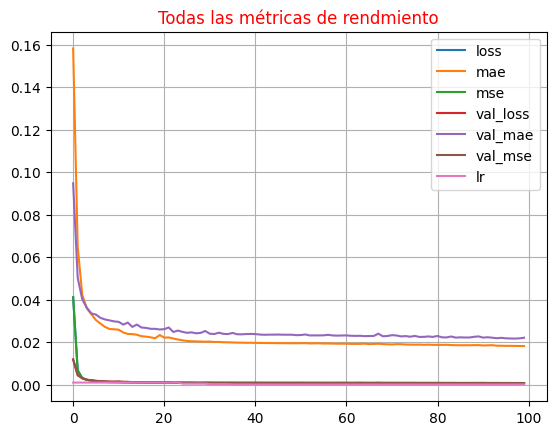

In [ ]:
# Visualización del historial de métricas de rendimiento durante el entrenamiento

# Crear un DataFrame 'hpd' con el historial de métricas del entrenamiento
hpd = pd.DataFrame(history.history)

# Generar un gráfico con las métricas de rendimiento
hpd.plot()

# Configurar título y detalles del gráfico
plt.title('Todas las métricas de rendimiento', color='red')  # Título del gráfico
plt.grid(True)                                             # Mostrar cuadrícula en el gráfico

# Mostrar el gráfico
plt.show()

In [ ]:
# Guardar y descargar el modelo entrenado

# Guardar el modelo entrenado en un archivo h5
model_GRU.save('model_GRU_M_18S.h5')

# Imprimir mensaje de confirmación
print('Model Saved!')

# Descargar el archivo h5
files.download('/content/model_GRU_M_18S.h5')

Model Saved!


# Conformal RNN M 36

In [ ]:
# Copiar conjuntos de datos para uso posterior

# Realizar copias de los conjuntos de entrenamiento y validación
X_train = X_train.copy()
y_train = Y_train.copy()
X_cal = X_Val.copy()
y_cal = Y_Val.copy()

# Copiar conjuntos de prueba para uso posterior
X_val = X_test.copy()
y_val = Y_test.copy()

In [ ]:
# Cálculo y evaluación del cuantil de las predicciones

# Definir nivel de confianza
alpha = 0.91

# Realizar predicciones utilizando el modelo GRU
f = model_GRU.predict(X_cal)

# Definir el modelo para el cálculo del cuantil
model = model_GRU

# Calcular la longitud del conjunto de validación
N = len(y_cal)

# Calcular el cuantil utilizando la función 'np.quantile'
q_yhat = np.quantile(np.abs(y_cal - f), np.ceil((N + 1) * (1 - alpha)) / N)

# Imprimir el valor del cuantil calculado
print(q_yhat)

25/25 [==============================] - 1s 4ms/step
0.02722476081384938


In [ ]:
# Realizar predicciones utilizando el modelo en el conjunto de validación
f_val = model.predict(X_val).flatten()

99/99 [==============================] - 0s 4ms/step


In [ ]:
# Función para calcular la cobertura y cálculo de la cobertura

def calculate_coverage(lower_bound, upper_bound, y_true):
    """
    Calcula la cobertura de un intervalo de predicción respecto a los valores reales.

    Parámetros:
    - lower_bound (array-like): Límites inferiores del intervalo de predicción.
    - upper_bound (array-like): Límites superiores del intervalo de predicción.
    - y_true (array-like): Valores reales o verdaderos.

    Retorna:
    - coverage (float): Cobertura del intervalo de predicción.

    Notas:
    - Esta función calcula la cobertura de un intervalo de predicción para un conjunto de valores reales.
    - 'lower_bound' y 'upper_bound' son listas o arrays con los límites inferior y superior del intervalo,
      respectivamente.
    - 'y_true' es una lista o array con los valores reales correspondientes.
    - La función calcula cuántos valores reales están fuera del intervalo de predicción y devuelve la
      fracción de valores dentro del intervalo.
    """

    out_of_bound = 0
    N = len(y_true)

    for i in range(N):
        if y_true[i] < lower_bound[i] or y_true[i] > upper_bound[i]:
            out_of_bound += 1

    return 1 - out_of_bound / N

# Calcular y mostrar la cobertura
lower_bound = f_val - q_yhat
upper_bound = f_val + q_yhat
Cover = calculate_coverage(lower_bound, upper_bound, y_val)
print('Coverage of {}'.format(Cover))

Coverage of 0.7091430391844536


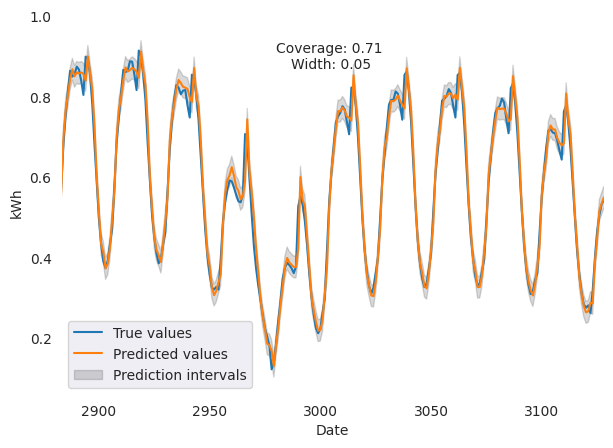

In [ ]:
# Visualización de resultados utilizando gráficos

# Configurar el tamaño predeterminado de las figuras
plt.rcParams["figure.figsize"] = (7, 5)

# Configurar el estilo de la grilla
sns.set_style("darkgrid", {'axes.grid': True})

# Crear una lista de índices
ind = [i for i in range(len(y_val))]

# Graficar los valores verdaderos y predichos
plt.plot(ind, y_val, label='True values')
plt.plot(ind, f_val, label='Predicted values')

# Rellenar el área entre los intervalos de predicción
plt.fill_between(ind, f_val - q_yhat, f_val + q_yhat,
                 color='k', alpha=.15, label='Prediction intervals')

# Establecer límites en el eje x
plt.xlim(2883, 3128)

# Calcular posición para el texto de cobertura y ancho
center_x = (2883 + 3128) / 2
center_y = (max(f_val) + min(f_val)) / 2
plt.text(3005, 0.9, f"Coverage: {round(Cover, 2)} \nWidth: {round(2 * q_yhat, 2)}",
         ha="center", va="center")

# Establecer etiquetas de ejes
plt.xlabel("Date")
plt.ylabel("kWh")

# Cambiar el fondo del gráfico a blanco
plt.gca().set_facecolor('white')

# Mostrar los bordes de los ejes
for spine in plt.gca().spines.values():
    spine.set_visible(True)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Imprimir el doble del ancho del intervalo de predicción
print(2 * q_yhat)

0.05444952162769876


# tiempo

In [ ]:
# Cálculo del tiempo transcurrido

# Registrar el tiempo de finalización
fin = time.time()

# Calcular el tiempo transcurrido
tiempo_transcurrido = fin - inicio

# Imprimir el tiempo transcurrido en segundos
print("Tiempo transcurrido: ", tiempo_transcurrido, "segundos")

Tiempo transcurrido:  95.49480128288269 segundos
